In [2]:
# importing dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
messages=pd.read_csv('messages.csv')

In [4]:
messages

subject  \
0               job posting - apple-iss research center   
1                                                   NaN   
2     query : letter frequencies for text identifica...   
3                                                  risk   
4                              request book information   
...                                                 ...   
2888                       love your profile - ysuolvpv   
2889                 you have been asked to join kiddin   
2890                 anglicization of composers ' names   
2891  re : 6 . 797 , comparative method : n - ary co...   
2892               re : american - english in australia   

                                                message  label  
0     content - length : 3386 apple-iss research cen...      0  
1     lang classification grimes , joseph e . and ba...      0  
2     i am posting this inquiry for sergei atamas ( ...      0  
3     a colleague and i are researching the differin...      0  
4     earlier this morning i was on the phone with a...      0  
...                                                 ...    ...  
2888  hello thanks for stopping by ! ! we have taken...      1  
2889  the list owner of : " kiddin " has invited you...      1  
2890  judging from the return post , i must have sou...      0  
2891  gotcha ! there are two separate fallacies in t...      0  
2892  hello ! i ' m working on a thesis concerning a...      0  

[2893 rows x 3 columns]

In [5]:
messages.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [6]:
#from above data we can say spam messages as coded as "1" and normal messages are coded as "0
messages.label.value_counts()

0    2412
1     481
Name: label, dtype: int64

We can see there is a 481 spam messages.

We can see all the messages are in lower case only.

# Preprocessing

In [7]:
# length of messages
messages['length']=messages.message.str.len()

In [8]:
messages

subject  \
0               job posting - apple-iss research center   
1                                                   NaN   
2     query : letter frequencies for text identifica...   
3                                                  risk   
4                              request book information   
...                                                 ...   
2888                       love your profile - ysuolvpv   
2889                 you have been asked to join kiddin   
2890                 anglicization of composers ' names   
2891  re : 6 . 797 , comparative method : n - ary co...   
2892               re : american - english in australia   

                                                message  label  length  
0     content - length : 3386 apple-iss research cen...      0    2856  
1     lang classification grimes , joseph e . and ba...      0    1800  
2     i am posting this inquiry for sergei atamas ( ...      0    1435  
3     a colleague and i are researching the differin...      0     324  
4     earlier this morning i was on the phone with a...      0    1046  
...                                                 ...    ...     ...  
2888  hello thanks for stopping by ! ! we have taken...      1     262  
2889  the list owner of : " kiddin " has invited you...      1    2163  
2890  judging from the return post , i must have sou...      0    1039  
2891  gotcha ! there are two separate fallacies in t...      0    2949  
2892  hello ! i ' m working on a thesis concerning a...      0     700  

[2893 rows x 4 columns]

We can see lenth of the messages, They are lenghty messages

In [9]:
# length of subject
messages['sub_len']=messages.subject.str.len()

In [10]:
messages

subject  \
0               job posting - apple-iss research center   
1                                                   NaN   
2     query : letter frequencies for text identifica...   
3                                                  risk   
4                              request book information   
...                                                 ...   
2888                       love your profile - ysuolvpv   
2889                 you have been asked to join kiddin   
2890                 anglicization of composers ' names   
2891  re : 6 . 797 , comparative method : n - ary co...   
2892               re : american - english in australia   

                                                message  label  length  \
0     content - length : 3386 apple-iss research cen...      0    2856   
1     lang classification grimes , joseph e . and ba...      0    1800   
2     i am posting this inquiry for sergei atamas ( ...      0    1435   
3     a colleague and i are researching the differin...      0     324   
4     earlier this morning i was on the phone with a...      0    1046   
...                                                 ...    ...     ...   
2888  hello thanks for stopping by ! ! we have taken...      1     262   
2889  the list owner of : " kiddin " has invited you...      1    2163   
2890  judging from the return post , i must have sou...      0    1039   
2891  gotcha ! there are two separate fallacies in t...      0    2949   
2892  hello ! i ' m working on a thesis concerning a...      0     700   

      sub_len  
0        39.0  
1         NaN  
2        50.0  
3         4.0  
4        24.0  
...       ...  
2888     28.0  
2889     34.0  
2890     34.0  
2891     54.0  
2892     36.0  

[2893 rows x 5 columns]

In [11]:
# Dropping subject column
messages.drop(['subject','sub_len'],axis=1,inplace=True)
messages

message  label  length
0     content - length : 3386 apple-iss research cen...      0    2856
1     lang classification grimes , joseph e . and ba...      0    1800
2     i am posting this inquiry for sergei atamas ( ...      0    1435
3     a colleague and i are researching the differin...      0     324
4     earlier this morning i was on the phone with a...      0    1046
...                                                 ...    ...     ...
2888  hello thanks for stopping by ! ! we have taken...      1     262
2889  the list owner of : " kiddin " has invited you...      1    2163
2890  judging from the return post , i must have sou...      0    1039
2891  gotcha ! there are two separate fallacies in t...      0    2949
2892  hello ! i ' m working on a thesis concerning a...      0     700

[2893 rows x 3 columns]

In [12]:
# Removing punctuations
messages['message']=messages['message'].str.replace(r'[^\w\d\s]',' ')

# Replace whitespace between terms with a single space
messages['message']=messages['message'].str.replace(r'\s+',' ')
 
# Remove loading and trailing whitespace
messages['message']=messages['message'].str.replace(r'^\s+|\s+?$','')

In [13]:
# Remove stop words
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english'))

messages['message']=messages['message'].apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Creating column for cleaned messages length
messages['clean_msg']=messages.message.str.len()

In [15]:
messages

message  label  length  \
0     content length 3386 apple iss research center ...      0    2856   
1     lang classification grimes joseph e barbara f ...      0    1800   
2     posting inquiry sergei atamas satamas umabnet ...      0    1435   
3     colleague researching differing degrees risk p...      0     324   
4     earlier morning phone friend mine living south...      0    1046   
...                                                 ...    ...     ...   
2888  hello thanks stopping taken many new pics made...      1     262   
2889  list owner kiddin invited join mailing list li...      1    2163   
2890  judging return post must sounded like kind sel...      0    1039   
2891  gotcha two separate fallacies argument n ary c...      0    2949   
2892  hello working thesis concerning attitudes towa...      0     700   

      clean_msg  
0          2138  
1          1376  
2          1024  
3           210  
4           629  
...         ...  
2888        132  
2889       1206  
2890        643  
2891       1758  
2892        420  

[2893 rows x 4 columns]

In [16]:
#pip install wordcloud

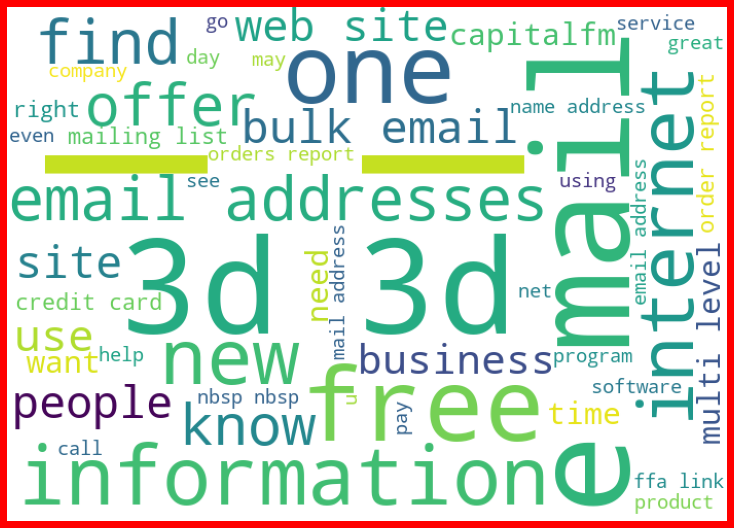

In [17]:
# visualize the frequency of the spam messages
from wordcloud import WordCloud

spam= messages['message'][messages['label']==1]

spam_cloud=WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spam))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

there is suspecious words in spam messahes like free,offer,email

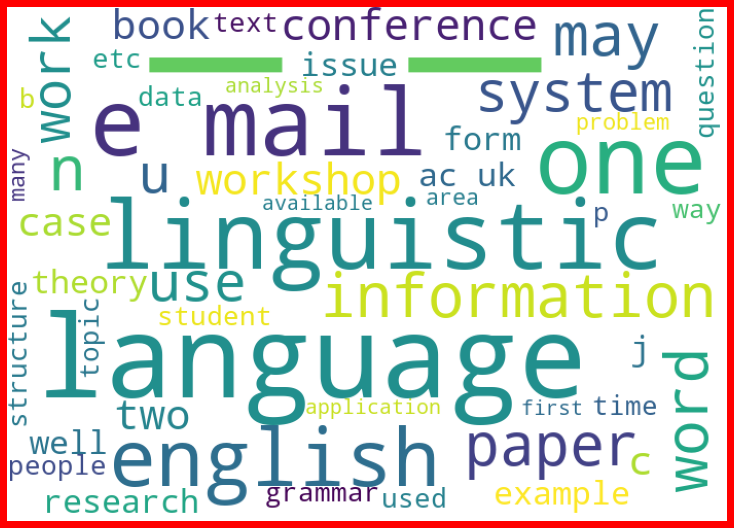

In [18]:
# visualize frequency of normal messages
normal= messages['message'][messages['label']==0]

spam_cloud=WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(normal))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see there is no suspecious word in normal messages

# Feature extraction

In [23]:
# convert text into vectors using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec= TfidfVectorizer()

features=tf_vec.fit_transform(messages['message'])

x=features
y=messages['label']

# Model building

In [24]:
# Instantiate MultinomialNB classifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [25]:
naive=MultinomialNB()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [28]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2169, 60595) (724, 60595) (2169,) (724,)


In [30]:
# training the model
naive.fit(x_train,y_train)

y_pred=naive.predict(x_test)
print('accuracy_score - ',accuracy_score(y_test,y_pred))

accuracy_score -  0.8342541436464088


In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       585
           1       1.00      0.14      0.24       139

    accuracy                           0.83       724
   macro avg       0.91      0.57      0.57       724
weighted avg       0.86      0.83      0.78       724



In [33]:
# confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[585,   0],
       [120,  19]], dtype=int64)